In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas import DataFrame
import statsmodels.api as sm
df = pd.read_csv('cost_revenue_clean.csv')

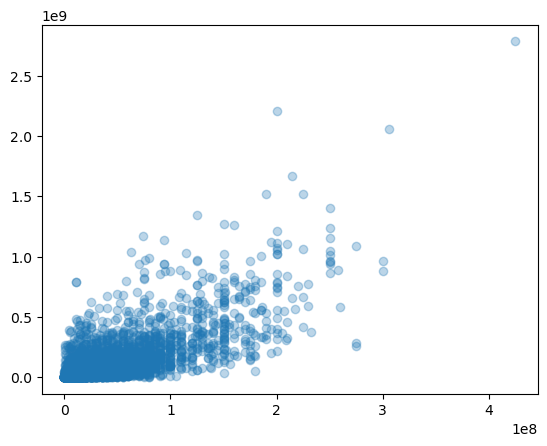

In [15]:
# Let's take a look at the scatter plot first
plt.scatter(df['production_budget_usd'], df['worldwide_gross_usd'], alpha=0.3)

In [16]:
df.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


In [17]:
X= DataFrame(df, columns=['production_budget_usd'])
y= DataFrame(df, columns=['worldwide_gross_usd'])

(0.0, 450000000.0)

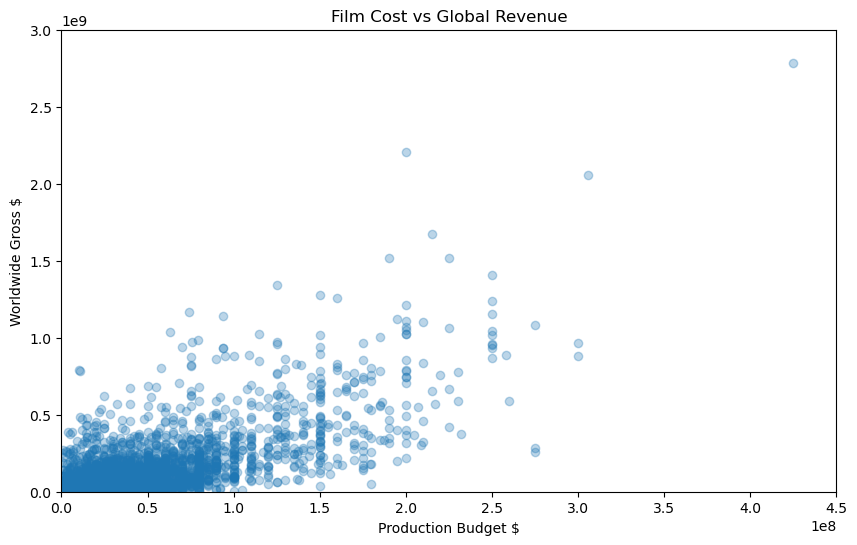

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)

In [19]:
regression = LinearRegression()
regression.fit(X,y)

LinearRegression()

Calcolo dello slope e dell'intercetta della retta di regressione

In [20]:
print(regression.coef_) #theta1
print(regression.intercept_) #theta0

[[3.11150918]]
[-7236192.72913963]


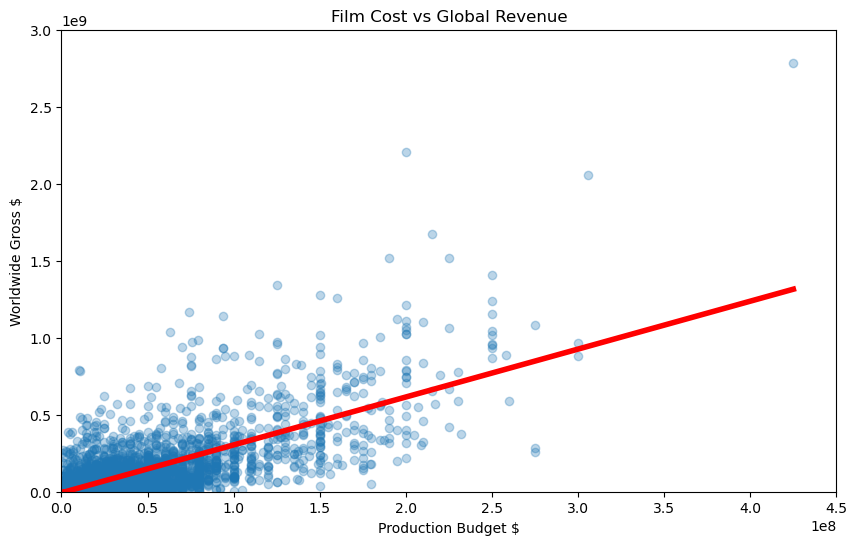

In [21]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.3)
plt.title('Film Cost vs Global Revenue')
plt.xlabel('Production Budget $')
plt.ylabel('Worldwide Gross $')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
# add the regression line to the scatter plot
plt.plot(X, regression.predict(X), color='red', linewidth=4)

Calcolo R^2 detto anche goodness of fit

In [22]:
print(regression.score(X,y))

0.5496485356985727


In [23]:
# compute the F-statistic and the p-value

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


                             OLS Regression Results                            
Dep. Variable:     worldwide_gross_usd   R-squared:                       0.550
Model:                             OLS   Adj. R-squared:                  0.550
Method:                  Least Squares   F-statistic:                     6141.
Date:                 Tue, 13 Dec 2022   Prob (F-statistic):               0.00
Time:                         21:43:58   Log-Likelihood:            -1.0061e+05
No. Observations:                 5034   AIC:                         2.012e+05
Df Residuals:                     5032   BIC:                         2.012e+05
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

la multicollinearità è un problema che si verifica quando due o più variabili indipendenti sono correlate tra loro. Questo può portare ad un bias nei coefficienti di regressione. Per evitare questo problema si può usare la regolarizzazione Lasso o Ridge.